# Grain sizes counting and distribution testing

## Preparations

In [239]:
import numpy as np
import matplotlib.pyplot as plt
# import ipympl
import imageio.v3 as iio
import skimage

In [240]:
metadata = iio.immeta(uri="data/structure01.jpg")
metadata

{'jfif': 257,
 'jfif_version': (1, 1),
 'dpi': (96, 96),
 'jfif_unit': 1,
 'jfif_density': (96, 96),
 'mode': 'RGB',
 'shape': (355, 267)}

(267, 355)

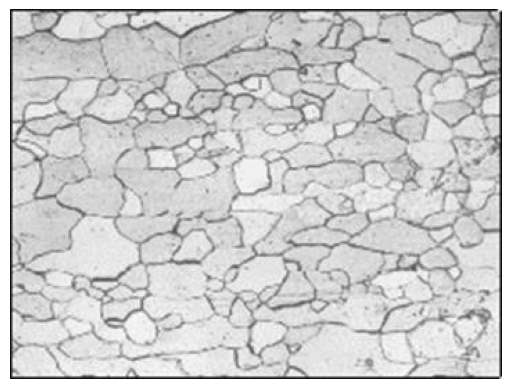

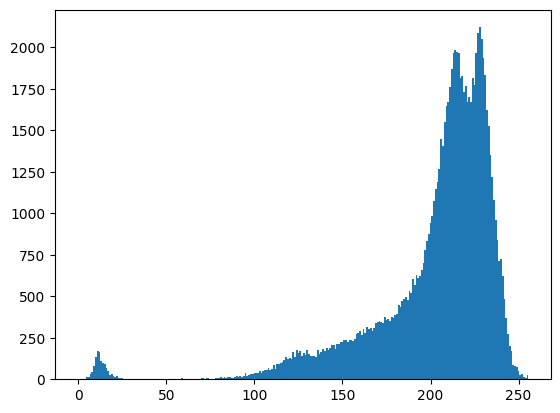

In [241]:
from skimage.filters import gaussian, median, roberts, sobel, scharr, prewitt, difference_of_gaussians, laplace
from skimage.feature import canny
from scipy import ndimage as ndi

image_original = iio.imread(uri="data/structure01.jpg")
fig, ax = plt.subplots()
plt.axis('off')
plt.imshow(image_original)
# print(image_original)
# image_original.shape

bins = np.arange(-0.5, 255+1,1)
fig, ax = plt.subplots()
plt.hist(image_original[:,:,0].flatten(), bins=bins)

image.shape

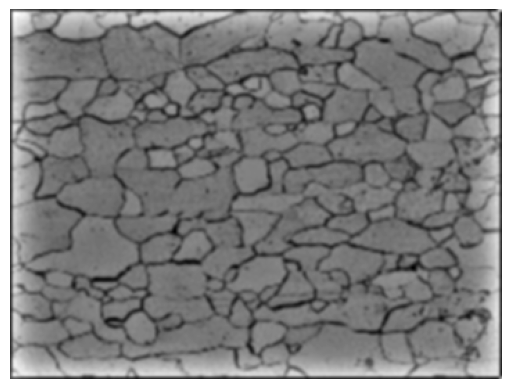

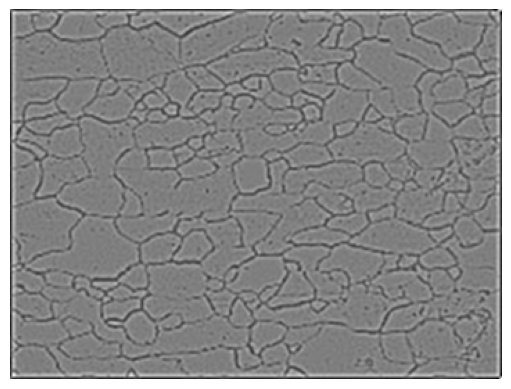

In [242]:
gray_image = skimage.color.rgb2gray(image_original)
# fig, ax = plt.subplots()
# plt.axis('off')
# plt.imshow(gray_image, cmap='gray')
filtered_image = difference_of_gaussians(gray_image, 1, 12)
fig, ax = plt.subplots()
plt.axis('off')
plt.imshow(filtered_image, cmap='gray')
image_edges = laplace(filtered_image, 8)
image = image_edges.copy()
fig, ax = plt.subplots()
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.autoscale(tight=True)
plt.show()

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 72090.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

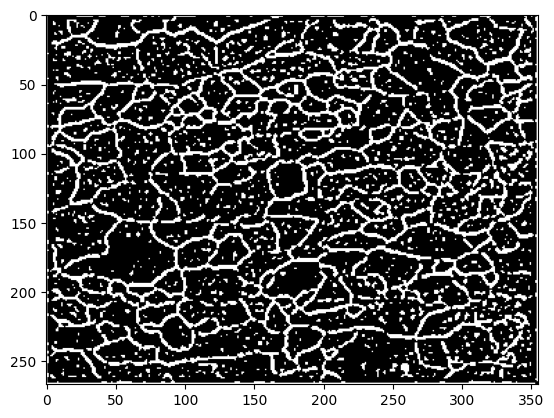

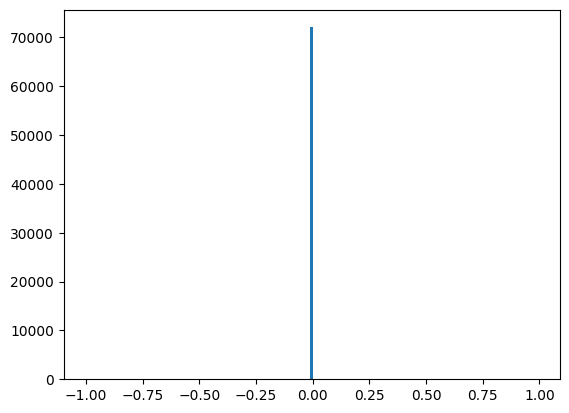

In [243]:
from skimage import exposure

# Contrast stretching
p2, p98 = np.percentile(image, (2, 98))
img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(image)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

img_eq[img_eq>0.25] = 1
img_eq[img_eq<=0.25] = 0
img_eq = 1 - img_eq
fig, ax = plt.subplots()
plt.imshow(img_eq, cmap='gray')
fig, ax = plt.subplots()
plt.hist(img_eq.copy().flatten(), bins=np.arange(-1, 1, 0.01))


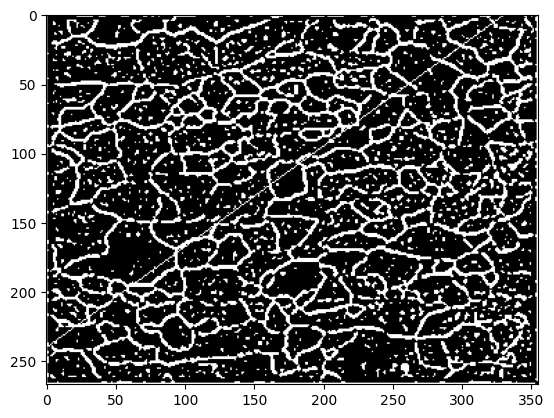

In [244]:
from skimage.draw import line

rr, cc = line(0,330,240,0)
# print(list(zip(rr,cc)))
image_copy = np.zeros(img_eq.shape, np.uint8)
image_copy = img_eq.copy()
image_copy[rr, cc] = 1
plt.imshow(image_copy, cmap='gray')

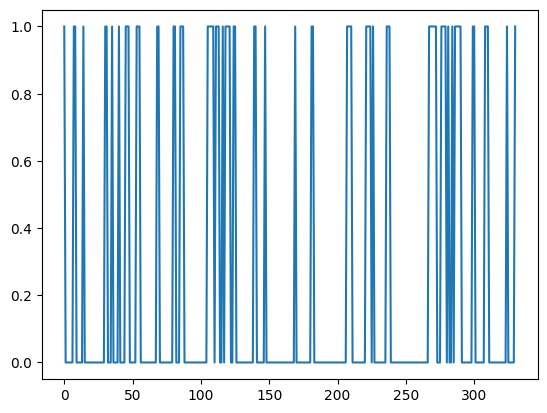

In [245]:
line_pixels=img_eq[rr, cc]
plt.plot(line_pixels)
# line_pixels

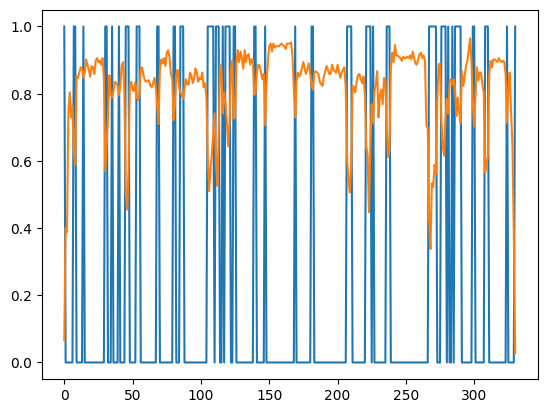

In [246]:
gray_line_pixels=gray_image[rr, cc]
plt.plot(line_pixels)
plt.plot(gray_line_pixels)
plt.show()

0.628796286415433


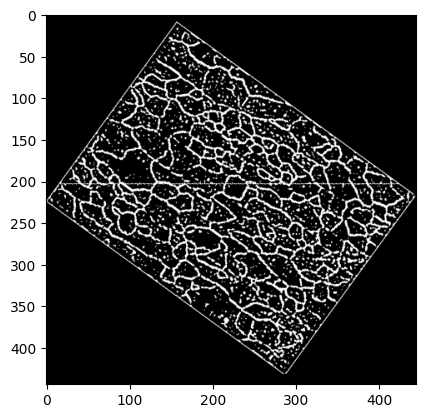

In [247]:
from skimage.transform import rotate
import math
angle = math.atan(240/330)
print(angle)
new_size = int(math.sqrt(image_copy.shape[0]*image_copy.shape[0]+image_copy.shape[1]*image_copy.shape[1]))
padded = np.zeros((new_size, new_size), np.uint8)

x_center = (new_size - image_copy.shape[1]) // 2
y_center = (new_size - image_copy.shape[0]) // 2

padded[y_center:y_center+image_copy.shape[0], 
       x_center:x_center+image_copy.shape[1]] = image_copy

rotated = rotate(padded, -angle/math.pi*180)
plt.imshow(rotated, cmap='gray')

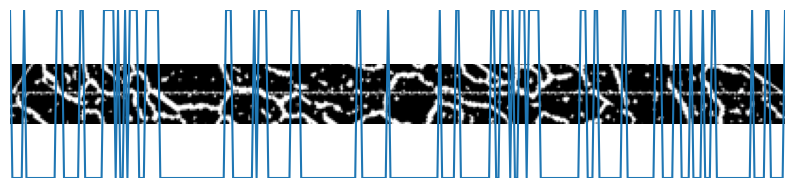

In [248]:
stripe_image = rotated[188:220, 15:425]
fig = plt.figure()
fig.set_figwidth(10)
fig.add_subplot(2, 1, 1)
plt.imshow(stripe_image, cmap='gray')
plt.axis('off')
fig.add_subplot(2, 1, 1)
plt.plot(np.flip(line_pixels))
# plt.plot(line_pixels)
plt.axis('off')
plt.autoscale(tight=True)
plt.show()

In [249]:
peaks = line_pixels.copy()
print(line_pixels.sum())
for i in range(3, len(line_pixels)-3):
    if not peaks[i] and peaks[i-1] and not peaks[i-2] and peaks[i+1] and not peaks[i+2]:
        peaks[i] = True
    else:
        if peaks[i] and not peaks[i-1] and peaks[i-2] and not peaks[i+1] and peaks[i+2]:
            peaks[i] = False
peaks = np.flip(peaks)
print(peaks.sum())
# peaks

78.0
78.0


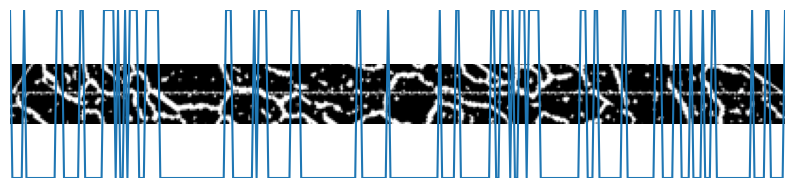

In [250]:
fig = plt.figure()
fig.set_figwidth(10)
fig.add_subplot(2, 1, 1)
plt.imshow(stripe_image, cmap='gray')
plt.axis('off')
fig.add_subplot(2, 1, 1)
plt.plot(peaks)
plt.axis('off')
plt.autoscale(tight=True)
plt.show()

(array([3., 2., 3., 2., 1., 1., 1., 0., 2., 1., 1., 2., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([ 3.        ,  3.86206897,  4.72413793,  5.5862069 ,  6.44827586,
         7.31034483,  8.17241379,  9.03448276,  9.89655172, 10.75862069,
        11.62068966, 12.48275862, 13.34482759, 14.20689655, 15.06896552,
        15.93103448, 16.79310345, 17.65517241, 18.51724138, 19.37931034,
        20.24137931, 21.10344828, 21.96551724, 22.82758621, 23.68965517,
        24.55172414, 25.4137931 , 26.27586207, 27.13793103, 28.        ]),
 <BarContainer object of 29 artists>)

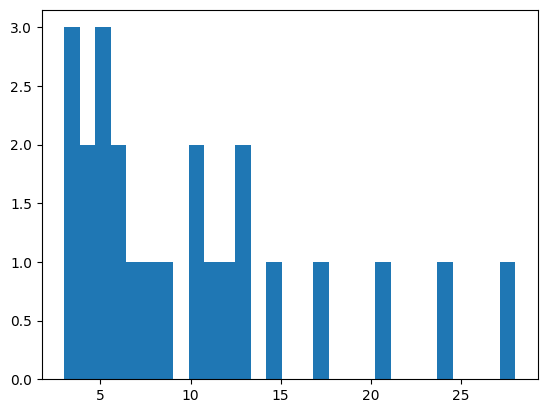

In [251]:
grains = []
curr_len = 0
for i in range(len(peaks)):
    if peaks[i]:
        if curr_len > 0:
            grains.append(curr_len)
        curr_len = 0
    else:
        curr_len += 1
grains = np.array(grains)
plt.hist(grains[grains>2], density=False, bins=max(grains)+1)
